In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Source: JHU
covid19_20 = pd.read_csv('https://raw.githubusercontent.com/soltaniehha/datasets/main/US-Covid-Cases-2020.csv')
covid19_21 = pd.read_csv('https://raw.githubusercontent.com/soltaniehha/datasets/main/US-Covid-Cases-2021.csv')
covid19_22 = pd.read_csv('https://raw.githubusercontent.com/soltaniehha/datasets/main/US-Covid-Cases-2022.csv')
covid19_23 = pd.read_csv('https://raw.githubusercontent.com/soltaniehha/datasets/main/US-Covid-Cases-2023.csv')

covid19 = pd.concat([covid19_20, covid19_21, covid19_22, covid19_23])

covid19

,province_state,fips,date,confirmed,deaths
0,Washington,NaN,2020-01-22,1,NaN
1,Washington,NaN,2020-01-23,1,NaN
2,Chicago,NaN,2020-01-24,1,NaN
3,Washington,NaN,2020-01-24,1,NaN
4,Illinois,NaN,2020-01-25,1,NaN
...,...,...,...,...,...
131155,Wyoming,56039.0,2023-02-09,12104,16.0
131156,Wyoming,56041.0,2023-02-09,6368,43.0
131157,Wyoming,56043.0,2023-02-09,2741,50.0
131158,Wyoming,56045.0,2023-02-09,1888,23.0


In [3]:
covid19.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3421466 entries, 0 to 131159
Data columns (total 5 columns):
 #   Column          Dtype  
---  ------          -----  
 0   province_state  object 
 1   fips            float64
 2   date            object 
 3   confirmed       int64  
 4   deaths          float64
dtypes: float64(2), int64(1), object(2)
memory usage: 156.6+ MB


In [4]:
covid19.dropna(subset=['fips'], inplace=True)
covid19.date = pd.to_datetime(covid19.date, format='%Y-%m-%d')
covid19.fips = covid19.fips.astype(int)
covid19.columns = ['state', 'county', 'date', 'confirmed', 'deaths']
covid19 = covid19.sort_values(['date', 'state', 'county'])
covid19

,state,county,date,confirmed,deaths
1560,Alabama,1001,2020-03-22,0,0.0
1561,Alabama,1003,2020-03-22,2,0.0
1562,Alabama,1005,2020-03-22,0,0.0
1563,Alabama,1007,2020-03-22,0,0.0
1564,Alabama,1009,2020-03-22,0,0.0
...,...,...,...,...,...
131155,Wyoming,56039,2023-02-09,12104,16.0
131156,Wyoming,56041,2023-02-09,6368,43.0
131157,Wyoming,56043,2023-02-09,2741,50.0
131158,Wyoming,56045,2023-02-09,1888,23.0


In [5]:
covid19.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3407981 entries, 1560 to 131159
Data columns (total 5 columns):
 #   Column     Dtype         
---  ------     -----         
 0   state      object        
 1   county     int64         
 2   date       datetime64[ns]
 3   confirmed  int64         
 4   deaths     float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 156.0+ MB


In [6]:
covid19.describe()

,county,confirmed,deaths
count,3.407981e+06,3.407981e+06,3.407981e+06
mean,3.228473e+04,1.484412e+04,1.996725e+02
std,1.792940e+04,6.412100e+04,8.044264e+02
min,6.000000e+01,-3.073000e+03,-8.200000e+01
25%,1.904100e+04,6.120000e+02,9.000000e+00
50%,3.005700e+04,2.667000e+03,4.400000e+01
75%,4.702900e+04,8.851000e+03,1.320000e+02
max,9.999900e+04,3.682771e+06,3.535500e+04


In [7]:
covid19.date.min()

Timestamp('2020-03-22 00:00:00')

In [8]:
covid19.date.max()

Timestamp('2023-02-09 00:00:00')

In [9]:
# confirmed column is a cumulative sum - so the total sum gives us the incorrect total
covid19.confirmed.sum()

50588476735

In [10]:
covid_last_day = covid19[covid19.date == covid19.date.max()]
covid_last_day = covid_last_day.drop('date', axis=1)
covid_last_day.head(2)

,state,county,confirmed,deaths
127881,Alabama,1001,19630,230.0
127882,Alabama,1003,69344,723.0


In [11]:
# This should give us the total
covid_last_day.confirmed.sum()

102372131

In [12]:
bar_data = covid_last_day.groupby('state')[['confirmed']].sum().sort_values('confirmed', ascending=False).reset_index()
bar_data

,state,confirmed
0,California,12028702
1,Texas,8398730
2,Florida,7483857
3,New York,6740500
4,Illinois,4040139
5,Pennsylvania,3490499
6,North Carolina,3438259
7,Ohio,3364860
8,Georgia,3042823
9,New Jersey,3019723


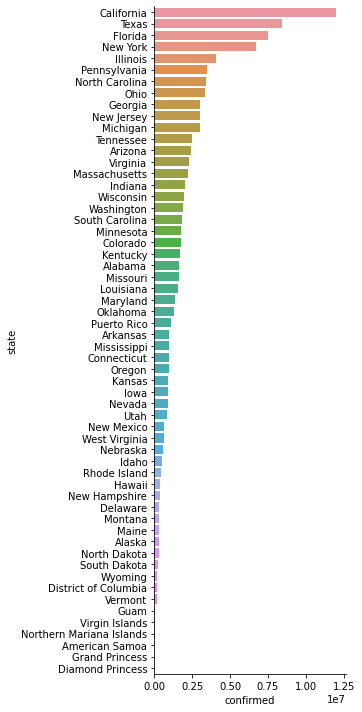

In [13]:
sns.catplot(data=bar_data, x='confirmed', y='state', kind='bar', 
            height=10, aspect=0.5);

In [14]:
covid19.date.max()

Timestamp('2023-02-09 00:00:00')

In [15]:
from datetime import timedelta
date_last_week = covid19.date.max() - timedelta(days=7)
covid_one_week_ago = covid19[covid19.date == date_last_week]
covid_one_week_ago = covid_one_week_ago.drop('date', axis=1)
covid_one_week_ago.head(2)

,state,county,confirmed,deaths
104928,Alabama,1001,19530,230.0
104929,Alabama,1003,69187,723.0


In [16]:
merged_df = pd.merge(covid_last_day, covid_one_week_ago, on=['state', 'county'], how='left', suffixes=('_0', '_7'))
merged_df.head(5)

,state,county,confirmed_0,deaths_0,confirmed_7,deaths_7
0,Alabama,1001,19630,230.0,19530,230.0
1,Alabama,1003,69344,723.0,69187,723.0
2,Alabama,1005,7387,103.0,7339,103.0
3,Alabama,1007,8012,109.0,7967,109.0
4,Alabama,1009,18488,261.0,18349,261.0


In [17]:
merged_df['confirmed'] = merged_df.confirmed_0 - merged_df.confirmed_7
merged_df['deaths'] = merged_df.deaths_0 - merged_df.deaths_7
merged_df.head(5)

,state,county,confirmed_0,deaths_0,confirmed_7,deaths_7,confirmed,deaths
0,Alabama,1001,19630,230.0,19530,230.0,100,0.0
1,Alabama,1003,69344,723.0,69187,723.0,157,0.0
2,Alabama,1005,7387,103.0,7339,103.0,48,0.0
3,Alabama,1007,8012,109.0,7967,109.0,45,0.0
4,Alabama,1009,18488,261.0,18349,261.0,139,0.0


In [18]:
covid_last_7_days = merged_df[['state', 'county', 'confirmed', 'deaths']]
covid_last_7_days.head(2)

,state,county,confirmed,deaths
0,Alabama,1001,100,0.0
1,Alabama,1003,157,0.0


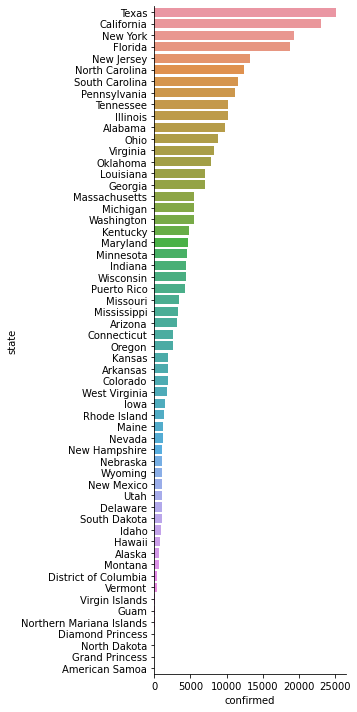

In [19]:
covid_last_7_days_state = covid_last_7_days.groupby('state')[['confirmed', 'deaths']].sum().sort_values('confirmed', ascending=False).reset_index()
sns.catplot(data=covid_last_7_days_state, x='confirmed', y='state', kind='bar', 
            height=10, aspect=0.5);

In [20]:
us_pop = pd.read_csv('https://raw.githubusercontent.com/soltaniehha/datasets/main/US_Population_By_State_2019.csv')
us_pop.head()

,STATE,POPULATION
0,Alabama,4903185
1,Alaska,731545
2,Arizona,7278717
3,Arkansas,3017804
4,California,39512223


In [21]:
df_7 = covid_last_7_days_state.merge(us_pop, how='right', left_on='state', right_on='STATE')
df_7.drop('STATE', axis=1, inplace=True)
df_7.head(2)

,state,confirmed,deaths,POPULATION
0,Alabama,9820,10.0,4903185
1,Alaska,692,0.0,731545


In [22]:
df_7['confirmed_per_m'] = df_7['confirmed'] / df_7['POPULATION'] * 1000000
df_7['deaths_per_m'] = df_7['deaths'] / df_7['POPULATION'] * 1000000
df_7.sort_values('confirmed_per_m', ascending=False, inplace=True)
df_7.head(2)

,state,confirmed,deaths,POPULATION,confirmed_per_m,deaths_per_m
40,South Carolina,11527,237.0,5148714,2238.811478,46.030912
0,Alabama,9820,10.0,4903185,2002.779826,2.039491


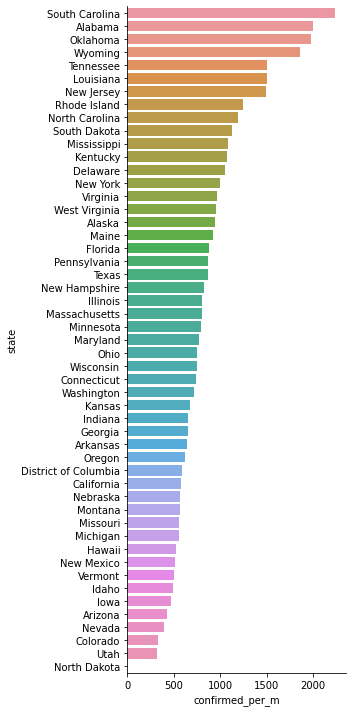

In [23]:
sns.catplot(data=df_7, x='confirmed_per_m', y='state', kind='bar', 
            height=10, aspect=0.5);

In [24]:
us_vax = pd.read_csv('https://raw.githubusercontent.com/soltaniehha/datasets/main/us_state_vaccinations.csv')
us_vax.head(5)

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used,total_boosters,total_boosters_per_hundred
0,2021-01-12,Alabama,78134.0,377025.0,70861.0,0.15,1.59,7270.0,1.45,7.69,NaN,NaN,NaN,0.207,NaN,NaN
1,2021-01-13,Alabama,84040.0,378975.0,74792.0,0.19,1.71,9245.0,1.53,7.73,5906.0,5906.0,1205.0,0.222,NaN,NaN
2,2021-01-14,Alabama,92300.0,435350.0,80480.0,NaN,1.88,NaN,1.64,8.88,8260.0,7083.0,1445.0,0.212,NaN,NaN
3,2021-01-15,Alabama,100567.0,444650.0,86956.0,0.28,2.05,13488.0,1.77,9.07,8267.0,7478.0,1525.0,0.226,NaN,NaN
4,2021-01-16,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7498.0,1529.0,NaN,NaN,NaN


In [25]:
us_vax.date.max()

'2023-01-11'

In [26]:
us_vax = us_vax[us_vax.date == us_vax.date.max()]
us_vax = us_vax[['location', 'people_fully_vaccinated_per_hundred']]
us_vax.columns = ['state', 'vax_rate']
us_vax.head(2)

,state,vax_rate
729,Alabama,53.06
1459,Alaska,65.00


In [27]:
df_7 = df_7.merge(us_vax)
df_7.head()

,state,confirmed,deaths,POPULATION,confirmed_per_m,deaths_per_m,vax_rate
0,South Carolina,11527,237.0,5148714,2238.811478,46.030912,59.76
1,Alabama,9820,10.0,4903185,2002.779826,2.039491,53.06
2,Oklahoma,7819,115.0,3956971,1976.006395,29.062634,60.33
3,Wyoming,1078,15.0,578759,1862.606024,25.917524,52.97
4,Tennessee,10249,79.0,6829174,1500.767150,11.568017,56.19


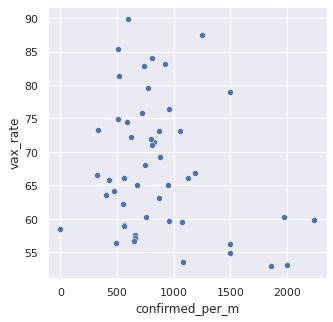

In [28]:
sns.set(rc={'figure.figsize':(5,5)})
sns.scatterplot(data=df_7, x='confirmed_per_m', y='vax_rate');

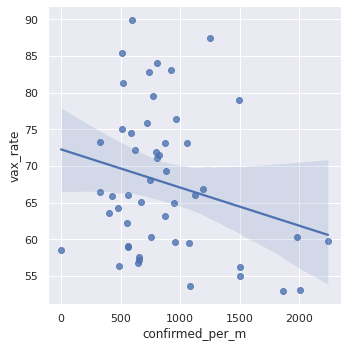

In [29]:
sns.lmplot(x="confirmed_per_m", y="vax_rate", data=df_7);

In [30]:
# Correlation
df_7['confirmed_per_m'].corr(df_7['vax_rate'])

-0.24133827626909385

In [31]:
# Install and import the package
!pip install plotly_express -q
import plotly_express as px

In [32]:
fig = px.scatter(df_7, x="confirmed_per_m", y="vax_rate", color="state")
fig.show()

In [33]:
abbrevs = pd.read_csv('https://raw.githubusercontent.com/soltaniehha/Business-Analytics/master/data/state-abbrevs.csv')
abbrevs.head(1)

,state,abbreviation
0,Alabama,AL


In [34]:
df_7 = df_7.merge(abbrevs)
df_7.head(1)

,state,confirmed,deaths,POPULATION,confirmed_per_m,deaths_per_m,vax_rate,abbreviation
0,South Carolina,11527,237.0,5148714,2238.811478,46.030912,59.76,SC


In [35]:
import plotly.express as px

px.scatter_geo(df_7, 
               locations='abbreviation', 
               locationmode='USA-states',
               color='confirmed_per_m', 
               size='vax_rate', 
               hover_name='state', 
               scope='usa'
               )

Replicating the [CDC chart](https://covid.cdc.gov/covid-data-tracker/#cases_casesper100klast7days).

In [36]:
import plotly.express as px

px.choropleth(df_7, 
              locations='abbreviation', 
              color='confirmed_per_m', 
              hover_name='state', 
              scope='usa',
              locationmode='USA-states',
              color_continuous_scale='viridis'
               )

# COVID-19 Mortality

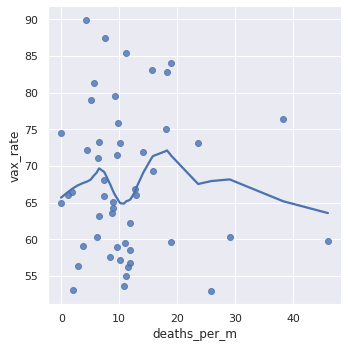

In [37]:
sns.lmplot(x="deaths_per_m", y="vax_rate", data=df_7,
           lowess=True);

In [38]:
# Correlation
df_7['deaths_per_m'].corr(df_7['vax_rate'])

-0.023759481629772188